In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [3]:
crime_data = pd.read_csv('../../datasets/data_2010/crime_2010_county_totals.csv')
crime_data = crime_data.set_index('County')
crime_data.index =  crime_data.index.astype(str)+' County'
crime_data.rename(index={'St Lawrence': 'St. Lawrence'},inplace=True)
crime_data.head()

,Year,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
County,,,,,,,,,,,
Albany County,2010,11036.0,1182.0,3.0,61.0,367.0,751.0,9854.0,1594.0,7905.0,355.0
Allegany County,2010,841.0,89.0,0.0,11.0,6.0,72.0,752.0,161.0,577.0,14.0
Bronx County,2010,34008.0,12070.0,127.0,191.0,4647.0,7105.0,21938.0,3223.0,16552.0,2163.0
Broome County,2010,6207.0,499.0,7.0,45.0,116.0,331.0,5708.0,974.0,4646.0,88.0
Cattaraugus County,2010,2019.0,181.0,1.0,22.0,15.0,143.0,1838.0,431.0,1365.0,42.0


In [4]:
population_data = pd.read_csv('../../datasets/data_2010/2010_racial_diversity_county.csv')
population_data.columns = population_data.iloc[0]
del population_data['Estimate Total Two or more races Two races including Some other race']
del population_data['Estimate Total Two or more races Two races excluding Some other race, and three or more races']
population_data["County"] = population_data["Geographic Area Name"].str.split(",").str[0]
del population_data["Geographic Area Name"]
del population_data["id"]
population_data = population_data.drop([0])
population_data = population_data.set_index('County')
population_data.head()
#population_data.count()

,Estimate Total,Estimate Total White alone,Estimate Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Estimate Total Asian alone,Estimate Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Estimate Total Two or more races
County,,,,,,,,
Albany County,304032,239946,36817,716,13414,185,6504,6450
Allegany County,49105,47388,507,157,487,12,144,410
Bronx County,1365725,299048,470130,6453,49076,177,497986,42855
Broome County,200804,178141,8832,615,6659,20,2093,4444
Cattaraugus County,80776,75552,1009,2292,475,20,251,1177


In [19]:
merged_df = population_data.merge(crime_data,how='inner',on='County')
merged_df["Estimate Total"] = pd.to_numeric(merged_df["Estimate Total"])
merged_df["Estimate Total White alone"] = pd.to_numeric(merged_df["Estimate Total White alone"])
merged_df["Estimate Total Black or African American alone"] = pd.to_numeric(merged_df["Estimate Total Black or African American alone"])
merged_df["Estimate Total American Indian and Alaska Native alone"] = pd.to_numeric(merged_df["Estimate Total American Indian and Alaska Native alone"])
merged_df["Estimate Total Asian alone"] = pd.to_numeric(merged_df["Estimate Total Asian alone"])
merged_df["Estimate Total Native Hawaiian and Other Pacific Islander alone"] = pd.to_numeric(merged_df["Estimate Total Native Hawaiian and Other Pacific Islander alone"])
merged_df = merged_df.sort_values(by=['Estimate Total'])
merged_df.head()

,Estimate Total,Estimate Total White alone,Estimate Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Estimate Total Asian alone,Estimate Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Estimate Total Two or more races,Year,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
County,,,,,,,,,,,,,,,,,,,
Hamilton County,4908,4741,27,0,34,0,32,74,2010,52.0,4.0,0.0,1.0,1.0,2.0,48.0,17.0,29.0,2.0
Schuyler County,18566,17977,292,42,28,0,16,211,2010,198.0,11.0,0.0,1.0,2.0,8.0,187.0,32.0,148.0,7.0
Yates County,25250,24594,281,78,83,0,37,177,2010,474.0,18.0,0.0,5.0,2.0,11.0,456.0,128.0,321.0,7.0
Lewis County,27017,26427,203,81,47,4,57,198,2010,462.0,25.0,0.0,3.0,2.0,20.0,437.0,186.0,235.0,16.0
Schoharie County,32789,31593,416,122,217,0,165,276,2010,467.0,17.0,0.0,2.0,3.0,12.0,450.0,98.0,343.0,9.0


In [20]:
pop_2010 = merged_df.iloc[:, 0]
crime_total_2010 = merged_df.iloc[:, 9]
violent_2010 = merged_df.iloc[:, 10]
property_2010 = merged_df.iloc[:, 15]
car_2010 = merged_df.iloc[:, 18]



Text(63.0, 0.5, 'Motor Vehicle Theft')

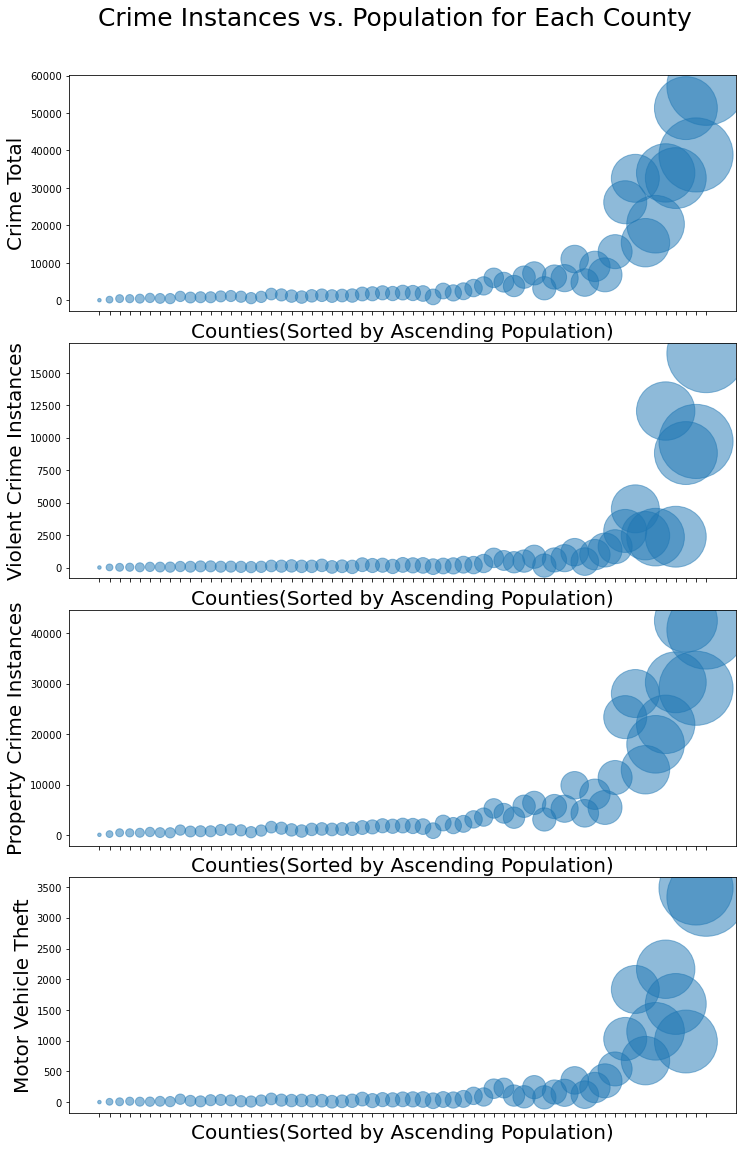

In [36]:
fig, (graph1,graph2,graph3,graph4) = plt.subplots(4,figsize=(10,15),sharex=False,sharey=False)
fig.tight_layout()
fig.suptitle("Crime Instances vs. Population for Each County", fontsize = 25, y = 1.05)

graph1.scatter(x =merged_df.index,y=crime_total_2010, s=pop_2010/400,alpha=.5)
graph1.axes.xaxis.set_ticklabels([])
graph1.set_xlabel("Counties(Sorted by Ascending Population)",fontsize=20)
graph1.set_ylabel("Crime Total",fontsize=20)

graph2.scatter(x=merged_df.index,y=violent_2010,s=pop_2010/400,alpha=.5)
graph2.axes.xaxis.set_ticklabels([])
graph2.set_xlabel("Counties(Sorted by Ascending Population)",fontsize=20)
graph2.set_ylabel("Violent Crime Instances",fontsize=20)

graph3.scatter(x=merged_df.index,y=property_2010,s=pop_2010/400,alpha=.5)
graph3.axes.xaxis.set_ticklabels([])
graph3.set_xlabel("Counties(Sorted by Ascending Population)",fontsize=20)
graph3.set_ylabel("Property Crime Instances",fontsize=20)

graph4.scatter(x=merged_df.index,y=car_2010,s=pop_2010/400,alpha=.5)
graph4.axes.xaxis.set_ticklabels([])
graph4.set_xlabel("Counties(Sorted by Ascending Population)",fontsize=20)
graph4.set_ylabel("Motor Vehicle Theft",fontsize=20)
